#아래는 연습

- GPU 런타임 유형 변경
- conv, pool,  fc layer 노드의 수 튜닝
- 아래 고양이 뭐 등 등 있는데 이미지 다운로드 하시고 -> 예측

In [2]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

num_classes = 10
im_rows = 32
im_cols = 32
in_shape = (im_rows, im_cols, 3)

# 데이터 읽어 들이기 --- (*1)
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# 데이터를 정규화하기 --- (*2)
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
# 레이블 데이터를 One-hot 형식으로 변환하기
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# 모델 정의하기 --- (*3)
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=in_shape))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# 모델 컴파일하기 --- (*4)
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# 학습 실행하기 --- (*5)
hist = model.fit(X_train, y_train,
    batch_size=32, epochs=5,
    verbose=1,
    validation_split=0.1)


Epoch 1/5
1407/1407 [==============================] - 16s 7ms/step - loss: 1.5201 - accuracy: 0.4437 - val_loss: 1.1335 - val_accuracy: 0.5988
Epoch 2/5
1407/1407 [==============================] - 8s 6ms/step - loss: 1.1431 - accuracy: 0.5932 - val_loss: 0.9524 - val_accuracy: 0.6724
Epoch 3/5
1407/1407 [==============================] - 8s 6ms/step - loss: 0.9895 - accuracy: 0.6493 - val_loss: 0.8501 - val_accuracy: 0.7048
Epoch 4/5
1407/1407 [==============================] - 8s 6ms/step - loss: 0.8969 - accuracy: 0.6855 - val_loss: 0.7751 - val_accuracy: 0.7324
Epoch 5/5
1407/1407 [==============================] - 11s 8ms/step - loss: 0.8297 - accuracy: 0.7076 - val_loss: 0.7215 - val_accuracy: 0.7532


313/313 [==============================] - 2s 6ms/step - loss: 0.7604 - accuracy: 0.7390
정답률= 0.7390000224113464 loss= 0.7603822946548462


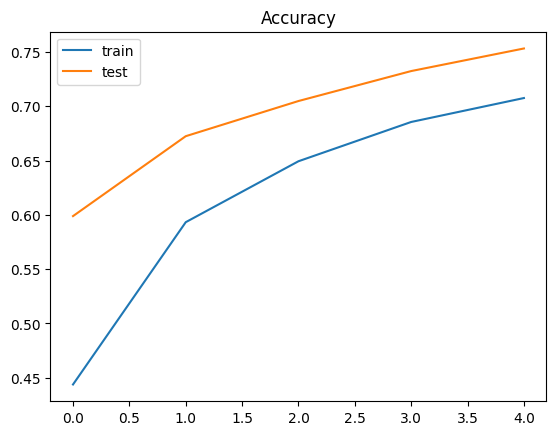

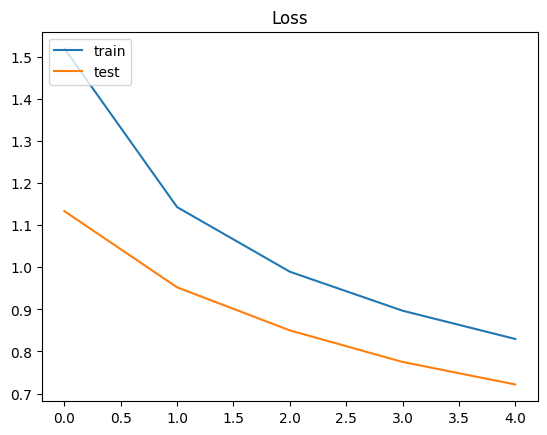

In [4]:
# 모델 평가하기 --- (*6)
score = model.evaluate(X_test, y_test, verbose=1)
print('정답률=', score[1], 'loss=', score[0])

# 학습 상태를 그래프로 그리기 --- (*7)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

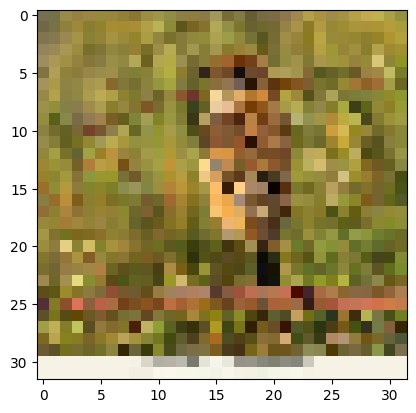

In [11]:
import cv2
import numpy as np
# 레이블 정보
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# OpenCV를 사용해서 이미지 읽어 들이기
im = cv2.imread('test-bird.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)  #test-car.jpg 업로드 필요
im = cv2.resize(im, (32, 32))
plt.imshow(im) # 이미지 출력하기
plt.show()

In [12]:
res = model.predict( im.reshape(-1, 32,32,3) )
print(labels[res.argmax()])

1/1 [==============================] - 0s 17ms/step
truck


연습 종료

#1. Data

In [ ]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

num_classes = 10
im_rows = 32
im_cols = 32
in_shape = (im_rows, im_cols, 3)

# 데이터 읽어 들이기 --- (*1)
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# 데이터를 정규화하기 --- (*2)
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
# 레이블 데이터를 One-hot 형식으로 변환하기
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# 모델 정의하기 --- (*3)
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=in_shape))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# 모델 컴파일하기 --- (*4)
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# 학습 실행하기 --- (*5)
hist = model.fit(X_train, y_train,
    batch_size=32, epochs=5,
    verbose=1,
    validation_split=0.1)


Epoch 1/5
1407/1407 [==============================] - 18s 7ms/step - loss: 1.5047 - accuracy: 0.4522 - val_loss: 1.0988 - val_accuracy: 0.6196
Epoch 2/5
1407/1407 [==============================] - 8s 6ms/step - loss: 1.1087 - accuracy: 0.6067 - val_loss: 0.9000 - val_accuracy: 0.6850
Epoch 3/5
1407/1407 [==============================] - 8s 6ms/step - loss: 0.9597 - accuracy: 0.6648 - val_loss: 0.7916 - val_accuracy: 0.7222
Epoch 4/5
1407/1407 [==============================] - 8s 6ms/step - loss: 0.8791 - accuracy: 0.6931 - val_loss: 0.7473 - val_accuracy: 0.7416
Epoch 5/5
1407/1407 [==============================] - 8s 6ms/step - loss: 0.8165 - accuracy: 0.7126 - val_loss: 0.7209 - val_accuracy: 0.7540


313/313 [==============================] - 2s 5ms/step - loss: 0.7555 - accuracy: 0.7389
정답률= 0.7389000058174133 loss= 0.7554576992988586


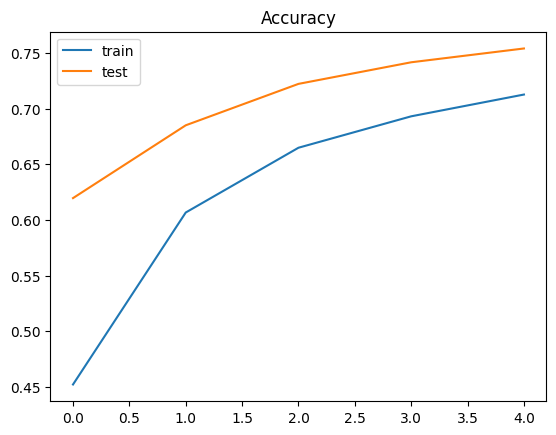

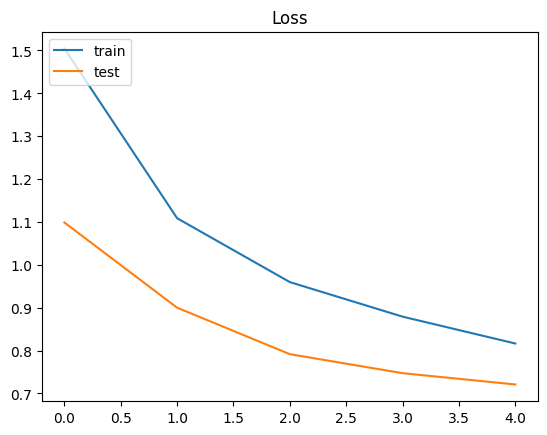

In [ ]:
# 모델 평가하기 --- (*6)
score = model.evaluate(X_test, y_test, verbose=1)
print('정답률=', score[1], 'loss=', score[0])

# 학습 상태를 그래프로 그리기 --- (*7)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

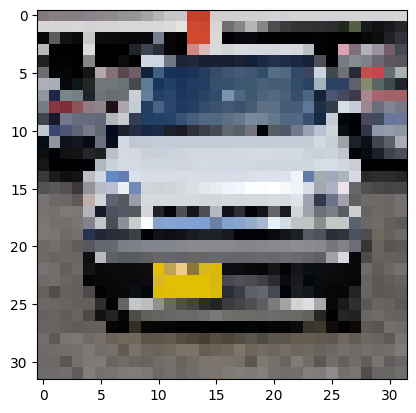

In [ ]:
import cv2
import numpy as np
# 레이블 정보
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# OpenCV를 사용해서 이미지 읽어 들이기
im = cv2.imread('test-car.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)  #test-car.jpg 업로드 필요
im = cv2.resize(im, (32, 32))
plt.imshow(im) # 이미지 출력하기
plt.show()

In [ ]:
res = model.predict( im.reshape(-1, 32,32,3) )
print(labels[res.argmax()])

1/1 [==============================] - 0s 31ms/step
automobile


#2. Optuna

In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 12.7 MB/s eta 0:00:00


In [ ]:
import optuna
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

img_rows, img_cols = 28, 28
num_classes = 10

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape, y_train.shape,x_test.shape,y_test.shape)

# 파티셔닝: 7:3
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train, test_size = 0.3, random_state =1234)

num_x_train = x_train.shape[0]
num_x_val = x_val.shape[0]
num_x_test = x_test.shape[0]

#min_max scaling / flattening
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

#Y: one hot encoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
#define the CNN model
def create_model(num_layer, mid_units, num_filters,dropout_rate):

    model = Sequential()
    model.add(Conv2D(filters=num_filters[0], kernel_size=(3, 3),
                 activation="relu",
                 input_shape=(img_rows, img_cols, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    for i in range(1,num_layer):
        model.add(Conv2D(filters=num_filters[i], kernel_size=(3,3), padding="same", activation="relu"))

    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate[0]))
    model.add(Flatten())
    model.add(Dense(mid_units))
    model.add(Dropout(dropout_rate[1]))
    model.add(Dense(num_classes, activation='softmax'))

    return model

In [ ]:
def objective(trial):
    #clear_session
    keras.backend.clear_session()

    #number of layer
    num_layer = trial.suggest_int("num_layer", 2, 4) # 2,3,4

    #FC 레이어 유닛 수
    #number of the unit
    mid_units = int(trial.suggest_discrete_uniform("mid_units", 10, 30, 10)) # 10, 20, 30

    #각 컨볼루션 레이어의 필터 수
    #number of the each convolution layer filter
    num_filters = [int(trial.suggest_discrete_uniform("num_filter_"+str(i), 16, 128, 16)) for i in range(num_layer)]
    #activation = trial.suggest_categorical("activation", ["relu", "sigmoid"])

    #Dropout
    #dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)
    #dropout_rate = [int(trial.suggest_uniform("dropout_rate"+str(ii), 0.0, 0.5)) for ii in range(2)]
    dropout_rate = [0] * 2
    dropout_rate[0] = trial.suggest_uniform('dropout_rate'+str(0), 0.0, 0.5) # 0과 0.5 사이 실수
    dropout_rate[1] = trial.suggest_uniform('dropout_rate'+str(1), 0.0, 0.5) # 0과 0.5 사이 실수

    #optimizer
    optimizer = trial.suggest_categorical("optimizer", ["sgd", "adam"])

    model = create_model(num_layer, mid_units, num_filters,dropout_rate)
    model.compile(optimizer=optimizer,
          loss="categorical_crossentropy",
          metrics=["acc"])

    history = model.fit(x_train, y_train, verbose=0, epochs=20, batch_size=128, validation_split=0.1)

    scores = model.evaluate(x_train, y_train)
    print('accuracy={}'.format(*scores))

    score = model.evaluate(x_test, y_test, verbose=0)[1]
    return score


In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=2)

[I 2024-05-13 09:53:28,570] A new study created in memory with name: no-name-8d7f8fa9-31fd-4a3c-b298-f4af6170c730
<ipython-input-18-eb413a3a8cbb>:10: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  mid_units = int(trial.suggest_discrete_uniform("mid_units", 10, 30, 10))
<ipython-input-18-eb413a3a8cbb>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  num_filters = [int(trial.suggest_discrete_uniform("num_filter_"+str(i), 16, 128, 16)) for i in range(num_layer)]
<ipython-input-18-eb413a3a8cbb>:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use su

1313/1313 [==============================] - 5s 4ms/step - loss: 0.0759 - acc: 0.9769
accuracy=0.07585229724645615


[I 2024-05-13 09:55:00,165] Trial 0 finished with value: 0.979200005531311 and parameters: {'num_layer': 4, 'mid_units': 30.0, 'num_filter_0': 96.0, 'num_filter_1': 32.0, 'num_filter_2': 16.0, 'num_filter_3': 16.0, 'dropout_rate0': 0.045556380402442254, 'dropout_rate1': 0.13205319328699283, 'optimizer': 'sgd'}. Best is trial 0 with value: 0.979200005531311.


1313/1313 [==============================] - 4s 3ms/step - loss: 0.0593 - acc: 0.9821
accuracy=0.05934730917215347


[I 2024-05-13 09:56:29,048] Trial 1 finished with value: 0.9818999767303467 and parameters: {'num_layer': 3, 'mid_units': 30.0, 'num_filter_0': 96.0, 'num_filter_1': 16.0, 'num_filter_2': 96.0, 'dropout_rate0': 0.2913892961456796, 'dropout_rate1': 0.19812544311252928, 'optimizer': 'sgd'}. Best is trial 1 with value: 0.9818999767303467.


In [ ]:
study.best_trial

FrozenTrial(number=1, state=TrialState.COMPLETE, values=[0.9818999767303467], datetime_start=datetime.datetime(2024, 5, 13, 9, 55, 0, 166429), datetime_complete=datetime.datetime(2024, 5, 13, 9, 56, 29, 48179), params={'num_layer': 3, 'mid_units': 30.0, 'num_filter_0': 96.0, 'num_filter_1': 16.0, 'num_filter_2': 96.0, 'dropout_rate0': 0.2913892961456796, 'dropout_rate1': 0.19812544311252928, 'optimizer': 'sgd'}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'num_layer': IntDistribution(high=4, log=False, low=2, step=1), 'mid_units': FloatDistribution(high=30.0, log=False, low=10.0, step=10.0), 'num_filter_0': FloatDistribution(high=128.0, log=False, low=16.0, step=16.0), 'num_filter_1': FloatDistribution(high=128.0, log=False, low=16.0, step=16.0), 'num_filter_2': FloatDistribution(high=128.0, log=False, low=16.0, step=16.0), 'dropout_rate0': FloatDistribution(high=0.5, log=False, low=0.0, step=None), 'dropout_rate1': FloatDistribution(high=0.5, log=False, low=

옵튜나 케라스튜나 등등 최적화 알고리즘 이런 것이 있다.